In [8]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [9]:
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [10]:
zip_file_path = '/content/animals.zip'
extract_folder = '/content/animals'

In [11]:
extract_zip(zip_file_path, extract_folder)

In [12]:
def load_images_from_folder(folder, label, num_images=100):
    images = []
    labels = []
    for filename in os.listdir(folder)[:num_images]:
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())
            labels.append(label)
    return images, labels

In [13]:
cat_folder = '/content/animals/animals/cats'
dog_folder = '/content/animals/animals/dogs'
panda_folder = '/content/animals/animals/panda'

In [14]:
cat_images, cat_labels = load_images_from_folder(cat_folder, 'cat')
dog_images, dog_labels = load_images_from_folder(dog_folder, 'dog')
panda_images, panda_labels = load_images_from_folder(panda_folder, 'panda')

In [15]:
images = np.array(cat_images + dog_images + panda_images)
labels = np.array(cat_labels + dog_labels + panda_labels)

In [16]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [17]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:

cv_results = []

In [20]:
for fold, (train_index, test_index) in enumerate(kf.split(images, encoded_labels), 1):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]


    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)


    fold_accuracy = {}

    for animal_idx, animal_name in enumerate(label_encoder.classes_):

        true_indices = np.where(y_test == animal_idx)[0]
        pred_indices = np.where(y_pred == animal_idx)[0]


        correct_preds = len(np.intersect1d(true_indices, pred_indices))
        total_samples = len(true_indices)


        if total_samples > 0:
            accuracy = correct_preds / total_samples
        else:
            accuracy = 0.0

        fold_accuracy[animal_name] = accuracy


    cv_results.append(fold_accuracy)


    print(f"Fold {fold} Accuracies:")
    for animal_name, accuracy in fold_accuracy.items():
        print(f"{animal_name}: {accuracy:.4f}")
    print('-' * 30)


print("Cross-validation results:", cv_results)

Fold 1 Accuracies:
cat: 0.2500
dog: 0.5500
panda: 0.1000
------------------------------
Fold 2 Accuracies:
cat: 0.5500
dog: 0.6500
panda: 0.0500
------------------------------
Fold 3 Accuracies:
cat: 0.5000
dog: 0.6500
panda: 0.0500
------------------------------
Fold 4 Accuracies:
cat: 0.4500
dog: 0.7500
panda: 0.0500
------------------------------
Fold 5 Accuracies:
cat: 0.4500
dog: 0.7000
panda: 0.0500
------------------------------
Cross-validation results: [{np.str_('cat'): 0.25, np.str_('dog'): 0.55, np.str_('panda'): 0.1}, {np.str_('cat'): 0.55, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.5, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.75, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.7, np.str_('panda'): 0.05}]


In [21]:
print("Cross-validation results:", cv_results)

Cross-validation results: [{np.str_('cat'): 0.25, np.str_('dog'): 0.55, np.str_('panda'): 0.1}, {np.str_('cat'): 0.55, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.5, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.75, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.7, np.str_('panda'): 0.05}]


In [22]:
folds = [fold + 1 for fold in range(len(cv_results))]
cat_accuracies = [fold_result['cat'] for fold_result in cv_results]
dog_accuracies = [fold_result['dog'] for fold_result in cv_results]
panda_accuracies = [fold_result['panda'] for fold_result in cv_results]


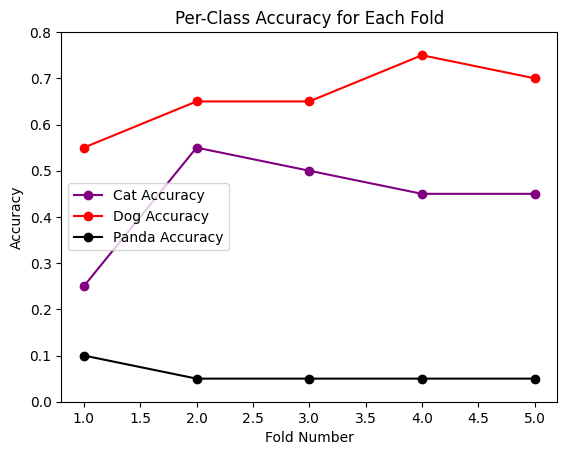

In [31]:
plt.plot(folds, cat_accuracies, marker='o', linestyle='-', color='purple', label='Cat Accuracy')
plt.plot(folds, dog_accuracies, marker='o', linestyle='-', color='red', label='Dog Accuracy')
plt.plot(folds, panda_accuracies, marker='o', linestyle='-', color='black', label='Panda Accuracy')

plt.title('Per-Class Accuracy for Each Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.0, 0.8)
plt.legend()
plt.show()


In [24]:
cv_results1 =[]

In [25]:
for fold, (train_index, test_index) in enumerate(kf.split(images, encoded_labels), 1):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]


    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)


    cv_results1.append(accuracy)


    print(f"Fold {fold} Accuracy: {accuracy:.4f}")

print("Cross-validation results:", cv_results)



Fold 1 Accuracy: 0.3000
Fold 2 Accuracy: 0.4167
Fold 3 Accuracy: 0.4000
Fold 4 Accuracy: 0.4167
Fold 5 Accuracy: 0.4000
Cross-validation results: [{np.str_('cat'): 0.25, np.str_('dog'): 0.55, np.str_('panda'): 0.1}, {np.str_('cat'): 0.55, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.5, np.str_('dog'): 0.65, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.75, np.str_('panda'): 0.05}, {np.str_('cat'): 0.45, np.str_('dog'): 0.7, np.str_('panda'): 0.05}]


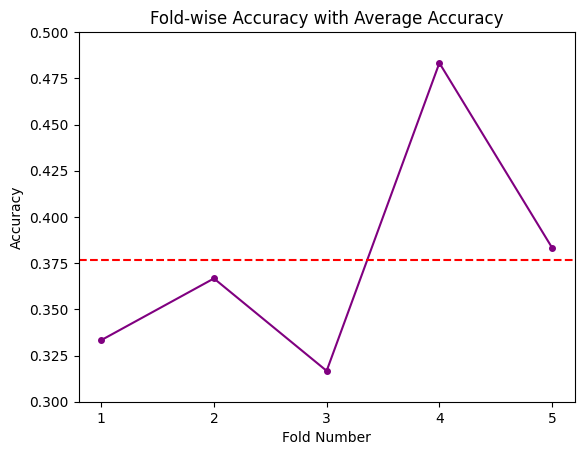

In [35]:


cv_results = [0.3333, 0.3667, 0.3167, 0.4833, 0.3833]
average_accuracy = np.mean(cv_results)
folds = [fold + 1 for fold in range(len(cv_results))]

plt.plot(folds, cv_results, marker='o', linestyle='-', color='purple', markersize=4)
plt.axhline(y=average_accuracy, color='r', linestyle='--')
plt.title('Fold-wise Accuracy with Average Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.ylim(0.3, 0.5)
plt.show()



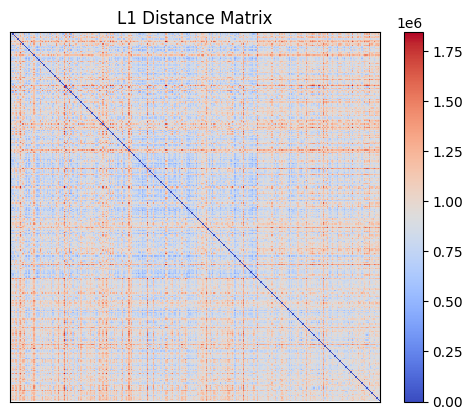

In [32]:


distance_matrix1 = cdist(images, images, metric='cityblock')

plt.imshow(distance_matrix1, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('L1 Distance Matrix')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()


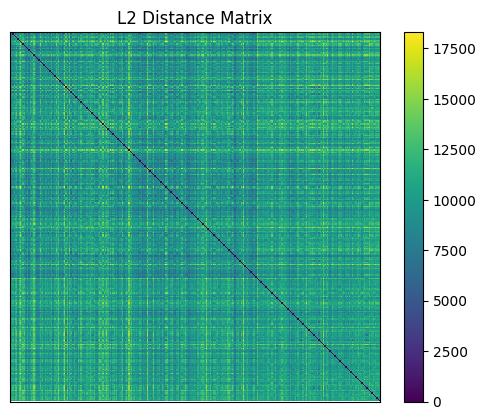

In [34]:


distance_matrix = cdist(images, images, metric='euclidean')

plt.imshow(distance_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('L2 Distance Matrix')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()


In this project, a K-Nearest Neighbors (KNN) classifier was applied to a dataset containing images of dogs, cats, and pandas. To ensure reliable performance evaluation, k-fold cross-validation was implemented, allowing the model to be trained and tested on different subsets of the data. The images were preprocessed and flattened into feature vectors suitable for KNN input. Two distance metrics—L1 (Manhattan) and L2 (Euclidean)—were used to measure similarity between data points. The model’s performance was assessed using both metrics, and average accuracy across folds was computed to provide a robust estimate. Results showed that the choice of distance metric significantly impacted classification accuracy, with L2 generally performing better in the high-dimensional image space. Confusion matrices and accuracy plots were used to visualize model effectiveness. This approach helped mitigate overfitting and highlighted the influence of metric selection and validation strategy on KNN classification outcomes.
